<a href="https://colab.research.google.com/github/ajmcquay/nm-covid/blob/master/nm_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
12/23 # Data

df = pd.read_csv('covid.csv',parse_dates=['date'],index_col=['date'])
df.sort_values(by=['date'], inplace=True, ascending=True)
df.dropna(axis=0, how='all', inplace=True)
df.fillna('0 new cases',inplace=True)
df.head(10)

,BernalilloCountyM,BernalilloCountyS,McKinleyCountyM,McKinleyCountyS,EddyCountyM,EddyCountyS,ChavesCountyM,ChavesCountyS,OteroCountyM,OteroCountyS
date,,,,,,,,,,
2020-03-27,27 new cases in Bernalillo County,0 new cases,2 new cases in McKinley County,0 new cases,0 new cases,1 new case in Eddy County,0 new cases,0 new cases,0 new cases,0 new cases
2020-03-28,11 new cases in Bernalillo County,0 new cases,0 new cases,0 new cases,0 new cases,1 new case in Eddy County,3 new cases in Chaves County,0 new cases,0 new cases,0 new cases
2020-03-29,9 new cases in Bernalillo County,0 new cases,4 new cases in McKinley County,0 new cases,0 new cases,1 new case in Eddy County,0 new cases,1 new case in Chaves County,0 new cases,0 new cases
2020-03-30,16 new cases in Bernalillo County,0 new cases,3 new cases in McKinley County,0 new cases,0 new cases,0 new cases,2 new cases in Chaves County,0 new cases,0 new cases,0 new cases
2020-03-31,12 new cases in Bernalillo County,0 new cases,4 new cases in McKinley County,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases
2020-04-01,19 new cases in Bernalillo County,0 new cases,4 new cases in McKinley County,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases,1 new case in Otero County
2020-04-02,15 new cases in Bernalillo County,0 new cases,4 new cases in McKinley County,0 new cases,0 new cases,0 new cases,3 new cases in Chaves County,0 new cases,0 new cases,0 new cases
2020-04-03,39 new cases in Bernalillo County,0 new cases,8 new cases in McKinley County,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases
2020-04-04,23 new cases in Bernalillo County,0 new cases,0 new cases,1 new case in McKinley County,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases,0 new cases


In [3]:
# TODO
# 1 - Scrape data for all other NM counties via crawler, roll into graph

# create array with all NM county names
counties = ['Bernalillo','Chaves','Eddy','McKinley','Otero']

for county in counties:
    # set up variables for columns with multiple cases (M) and single cases (S)
    countyM = county + 'CountyM'
    countyS = county + 'CountyS'
    
    # convert to strings and trim off non-numerical characters
    df[countyM] = df[countyM].astype(str)
    df[countyS] = df[countyS].astype(str)
    df[countyM] = df[countyM].str.extract(r'(\d+)', expand=False).astype(int)
    df[countyS] = df[countyS].str.extract(r'(\d+)', expand=False).astype(int)
    
    # add M and S columns, store sum in new column
    county_sum = df[countyM] + df[countyS]
    df[county] = county_sum
    
    # drop unused columns
    df = df.drop(countyM, 1)
    df = df.drop(countyS, 1)
    
    # calculate rolling 7-day average
    df[county] = df[county].rolling(window=7).mean().round(decimals=0)

# fill NaN fields where a sum for 7 days is not available
df.fillna(0, inplace=True)

df.tail(10)

,Bernalillo,Chaves,Eddy,McKinley,Otero
date,,,,,
2021-06-23,33.0,3.0,4.0,2.0,4.0
2021-06-24,33.0,3.0,4.0,2.0,3.0
2021-06-28,31.0,2.0,4.0,2.0,2.0
2021-06-30,31.0,2.0,3.0,2.0,2.0
2021-07-07,32.0,2.0,3.0,2.0,2.0
2021-07-13,29.0,2.0,3.0,2.0,3.0
2021-07-20,33.0,1.0,5.0,3.0,3.0
2021-07-26,63.0,4.0,14.0,5.0,3.0
2021-07-27,69.0,5.0,18.0,5.0,3.0


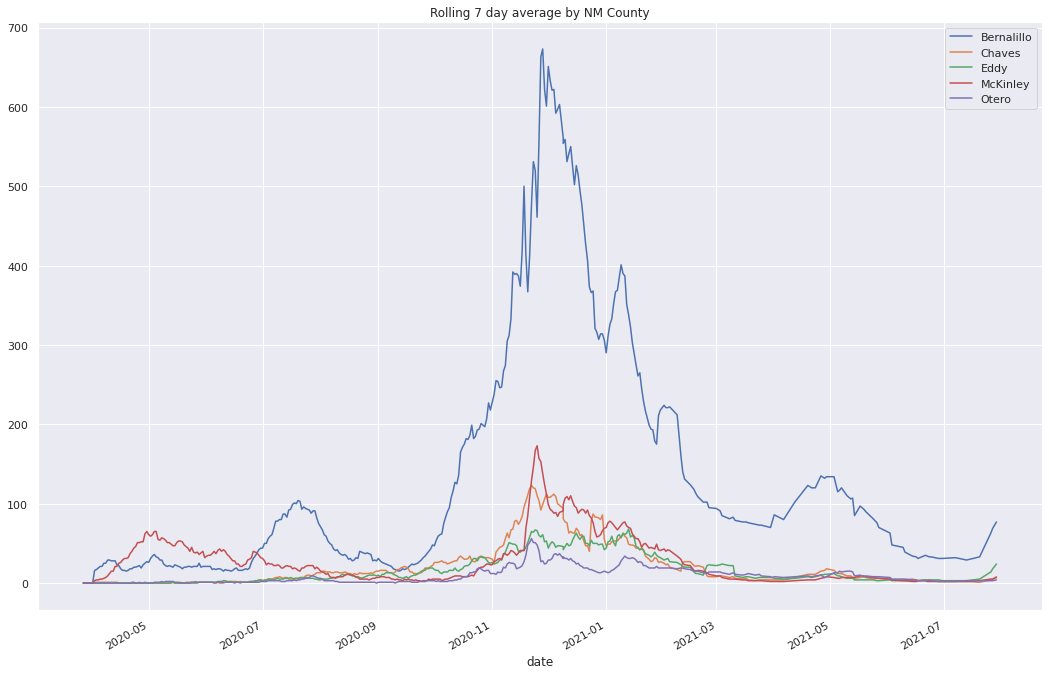

In [4]:
sns.set(style="darkgrid")
df.plot(title='Rolling 7 day average by NM County',figsize=(18,12))